In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib as mpl
import numpy as np

In [133]:
df = pd.read_csv('DATA_FINAL4.csv')
df.head()

,CIK,FiscalYearEnd,COVID-19,SupplyChain,Furlough,Benefit Cut,InternationalSupplyChain,ComboParagraph,FFI49,FFI30,FFI12
0,1750,31-May-20,23,10,7,10,0,59,42,26,9
1,1800,31-Dec-20,25,3,0,16,4,74,12,8,10
2,2098,"December 31, 2020",22,6,0,9,3,47,17,11,3
3,2178,31-Dec-20,15,1,0,2,1,29,42,26,9
4,2186,NONE,27,3,0,17,1,59,37,23,6


In [134]:
left = ['#F76902', '#F76902', '#F76902', '#7C878E', '#7C878E', '#7C878E']
right = ['#7C878E', '#7C878E', '#7C878E','#F76902', '#F76902', '#F76902']

In [135]:
items = []

for row in df['FFI49']:
    if row == 1.0:
        items.append('Agriculture')
    elif row == 2.0:
        items.append('Food Products')
    elif row == 3.0:
        items.append('Soda & Candy')
    elif row == 4.0:
        items.append('Beer & Liquor')
    elif row == 5.0:
        items.append('Tobacco Products')
    elif row == 6.0:
        items.append('Recreation')
    elif row == 7.0:
        items.append('Entertainment')
    elif row == 8.0:
        items.append('Printing & Publishing')
    elif row == 9.0:
        items.append('Household Consumer Goods')
    elif row == 10.0:
        items.append('Apparel')
    elif row == 11.0:
        items.append('Healthcare')
    elif row == 12.0:
        items.append('Medical Equipment')
    elif row == 13.0:
        items.append('Pharmaceutical Products')
    elif row == 14.0:
        items.append('Chemicals')
    elif row == 15.0:
        items.append('Rubber & Plastic Products')
    elif row == 16.0:
        items.append('Textiles')
    elif row == 17.0:
        items.append('Construction Materials')
    elif row == 18.0:
        items.append('Construction')
    elif row == 19.0:
        items.append('Steel Works')
    elif row == 20.0:
        items.append('Fabricated Products')
    elif row == 21.0:
        items.append('Machinery')
    elif row == 22.0:
        items.append('Electrical Equipment')
    elif row == 23.0:
        items.append('Automobiles & Trucks')
    elif row == 24.0:
        items.append('Aircraft')
    elif row == 25.0:
        items.append('Shipbuilding & Railroad Equipment')
    elif row == 26.0:
        items.append('Defense')
    elif row == 27.0:
        items.append('Precious Metals')
    elif row == 28.0:
        items.append('Non-Metallic & Industrial Metal Mining')
    elif row == 29.0:
        items.append('Coal')
    elif row == 30.0:
        items.append('Petroleum & Natural Gas')
    elif row == 31.0:
        items.append('Utilities')
    elif row == 32.0:
        items.append('Communication')
    elif row == 33.0:
        items.append('Personal Services')
    elif row == 34.0:
        items.append('Business Services')
    elif row == 35.0:
        items.append('Computer Hardware')
    elif row == 36.0:
        items.append('Computer Software')
    elif row == 37.0:
        items.append('Electronic Equipment')
    elif row == 38.0:
        items.append('Lab Measuring & Control Equipment')
    elif row == 39.0:
        items.append('Paper Business Supplies')
    elif row == 40.0:
        items.append('Shipping Containers')
    elif row == 41.0:
        items.append('Transportation')
    elif row == 42.0:
        items.append('Wholesale')
    elif row == 43.0:
        items.append('Retail')
    elif row == 44.0:
        items.append('Restaurants, Hotels, Motels')
    elif row == 45.0:
        items.append('Banking')
    elif row == 46.0:
        items.append('Insurance')
    elif row == 47.0:
        items.append('Real Estate')
    elif row == 48.0:
        items.append('Financial Trading')
    elif row == 49.0:
        items.append('Other')
    else:
        print('an error has occured on row', row)
        items.append('None---')

df['Industry'] = items
df.head()

,CIK,FiscalYearEnd,COVID-19,SupplyChain,Furlough,Benefit Cut,InternationalSupplyChain,ComboParagraph,FFI49,FFI30,FFI12,Industry
0,1750,31-May-20,23,10,7,10,0,59,42,26,9,Wholesale
1,1800,31-Dec-20,25,3,0,16,4,74,12,8,10,Medical Equipment
2,2098,"December 31, 2020",22,6,0,9,3,47,17,11,3,Construction Materials
3,2178,31-Dec-20,15,1,0,2,1,29,42,26,9,Wholesale
4,2186,NONE,27,3,0,17,1,59,37,23,6,Electronic Equipment


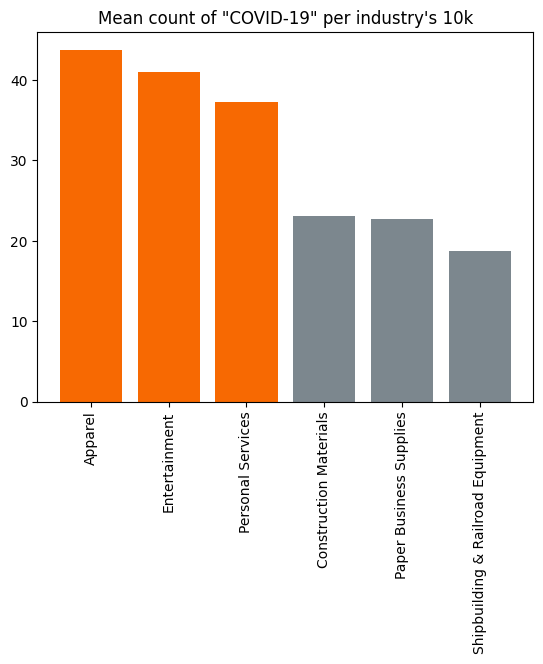

In [136]:
#find the industries with the average most occurences of the covid19 keyword
covid_df = df.groupby(['Industry'])['COVID-19'].describe()
sorted_covid = covid_df.sort_values(['mean'], ascending=False)

highest_sorted_covid = sorted_covid.iloc[0:3]
lowest_sorted_covid = sorted_covid.iloc[-3:]

covid_frames = [highest_sorted_covid, lowest_sorted_covid]
combined_covid = pd.concat(covid_frames)
combined_covid.reset_index(inplace=True)
plt.xticks(rotation=90)
plt.title('Mean count of "COVID-19" per industry\'s 10k')
mpl.rcParams.update(mpl.rcParamsDefault)
plot1 = plt.bar(combined_covid['Industry'], combined_covid['mean'], color=left)



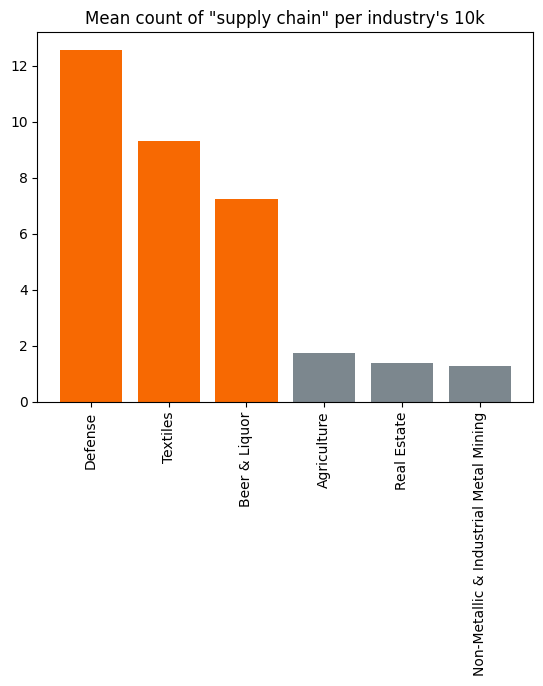

In [145]:
supplychain_df=df.groupby(['Industry'])['SupplyChain'].describe()
sorted_sc = supplychain_df.sort_values(['mean'], ascending=False)

highest_sorted_sc = sorted_sc.iloc[0:3]
lowest_sorted_sc = sorted_sc.iloc[-3:]


sorted_sc_frames = [highest_sorted_sc, lowest_sorted_sc]
combined_sorted_sc = pd.concat(sorted_sc_frames)
combined_sorted_sc.reset_index(inplace=True)
combined_sorted_sc = combined_sorted_sc.sort_values(['mean'], ascending=False)

plt.xticks(rotation=90)
plt.title('Mean count of "supply chain" per industry\'s 10k')
plot2 = plt.bar(combined_sorted_sc['Industry'], combined_sorted_sc['mean'], color=left)





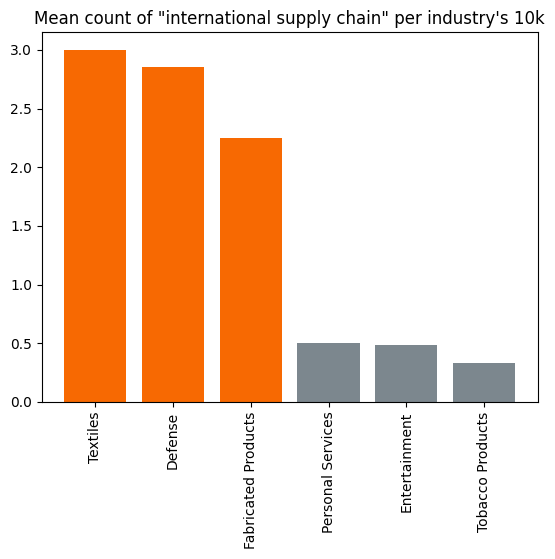

In [138]:
#get the international supply chain count summary stats
intsupplychain_df = df.groupby(['Industry'])['InternationalSupplyChain'].describe()
sorted_isc = intsupplychain_df.sort_values(['mean'], ascending=False)

#divide into the top 3 and lowest 3 mean counts of international supply chain
highest_sorted_isc = sorted_isc.iloc[0:3]
lowest_sorted_isc = sorted_isc.iloc[-3:]

#concat into a single df and sort by descending
sorted_isc_frames = [highest_sorted_isc, lowest_sorted_isc]
combined_sorted_isc=pd.concat(sorted_isc_frames)
combined_sorted_isc.reset_index(inplace=True)
combined_sorted_isc=combined_sorted_isc.sort_values(['mean'], ascending=False)

#plot the chart from least to most counts
plt.xticks(rotation=90)
plt.title('Mean count of "international supply chain" per industry\'s 10k')
plot3 = plt.bar(combined_sorted_isc['Industry'], combined_sorted_isc['mean'], color=left)


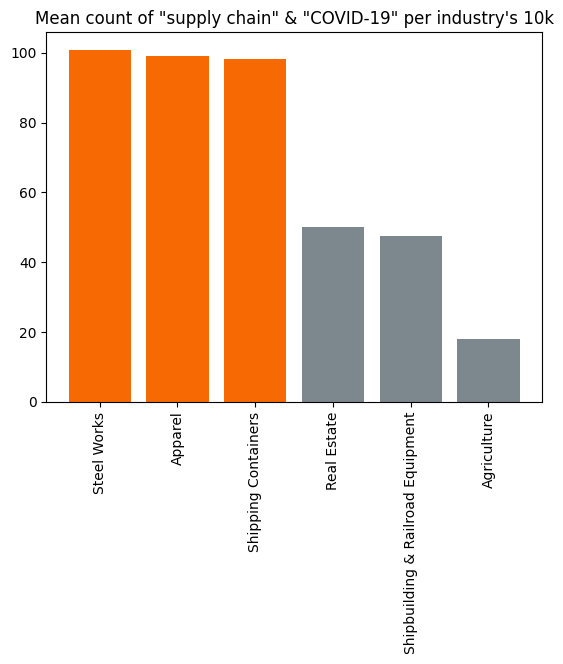

In [139]:
#get the international supply chain count summary stats
combo_df = df.groupby(['Industry'])['ComboParagraph'].describe()
sorted_combo = combo_df.sort_values(['mean'], ascending=False)

#divide into the top 3 and lowest 3 mean counts of international supply chain
highest_sorted_combo = sorted_combo.iloc[0:3]
lowest_sorted_combo = sorted_combo.iloc[-3:]

#concat into a single df and sort by descending
sorted_combo_frames = [highest_sorted_combo, lowest_sorted_combo]
combined_sorted_combo=pd.concat(sorted_combo_frames)
combined_sorted_combo.reset_index(inplace=True)
combined_sorted_combo=combined_sorted_combo.sort_values(['mean'], ascending=False)

#plot the chart from least to most counts
plt.xticks(rotation=90)
plt.title('Mean count of "supply chain" & "COVID-19" per industry\'s 10k')
plot4 = plt.bar(combined_sorted_combo['Industry'], combined_sorted_combo['mean'], color=left)



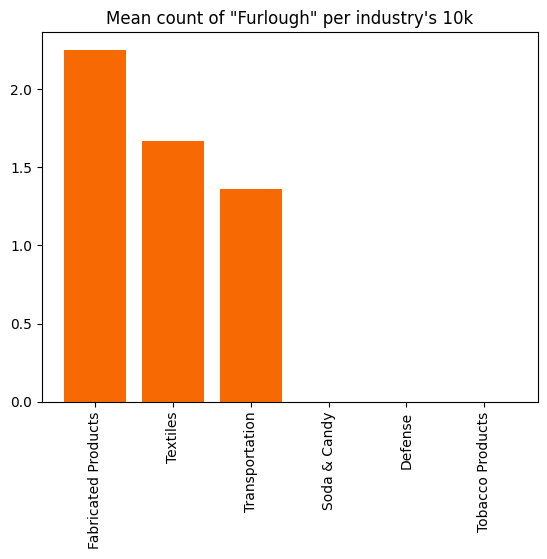

In [140]:
#get the furlough count summary stats
combo_df = df.groupby(['Industry'])['Furlough'].describe()
sorted_combo = combo_df.sort_values(['mean'], ascending=False)

#divide into the top 3 and lowest 3 mean counts of international supply chain
highest_sorted_combo = sorted_combo.iloc[0:3]
lowest_sorted_combo = sorted_combo.iloc[-3:]

#concat into a single df and sort by descending
sorted_combo_frames = [highest_sorted_combo, lowest_sorted_combo]
combined_sorted_combo=pd.concat(sorted_combo_frames)
combined_sorted_combo.reset_index(inplace=True)
combined_sorted_combo=combined_sorted_combo.sort_values(['mean'], ascending=False)

#plot the chart from least to most counts
plt.xticks(rotation=90)
plt.title('Mean count of "Furlough" per industry\'s 10k')
plot5 = plt.bar(combined_sorted_combo['Industry'], combined_sorted_combo['mean'], color=left)

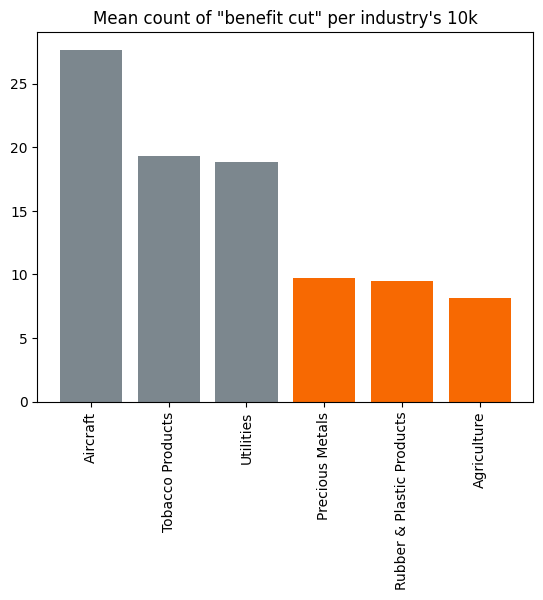

In [147]:
#get the benefit cut count summary stats
combo_df = df.groupby(['Industry'])['Benefit Cut'].describe()
sorted_combo = combo_df.sort_values(['mean'], ascending=False)

#divide into the top 3 and lowest 3 mean counts of benefit cuts
highest_sorted_combo = sorted_combo.iloc[0:3]
lowest_sorted_combo = sorted_combo.iloc[-3:]

#concat into a single df and sort by descending
sorted_combo_frames = [highest_sorted_combo, lowest_sorted_combo]
combined_sorted_combo=pd.concat(sorted_combo_frames)
combined_sorted_combo.reset_index(inplace=True)
combined_sorted_combo=combined_sorted_combo.sort_values(['mean'], ascending=False)

#plot the chart from least to most counts
plt.xticks(rotation=90)
plt.title('Mean count of "benefit cut" per industry\'s 10k')

plot6 = plt.bar(combined_sorted_combo['Industry'], combined_sorted_combo['mean'], color=right)